In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torch.utils.data as utils
import time
import os
import torch.nn as nn
from torch.autograd import Function
import torchvision
import torch.utils.data as data
from PIL import Image
import os

In [0]:
from torch.autograd import Function

class GradientReversalFn(Function):
  @staticmethod
  def forward(self, x, alpha):
    self.alpha=alpha
    
    return x.view_as(x)
  
  @staticmethod
  def backward(self, grad_output):
    output = grad_output.neg()*self.alpha
    
    return output, None

In [0]:
from torchvision import models
model_ft = models.resnet50(pretrained=True)

In [0]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
res50_model = models.resnet50(pretrained=True)
res50_conv = nn.Sequential(*list(res50_model.children())[:-1])

In [0]:
res50_conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [0]:
# class DACNN(nn.Module):
  
#   def __init__(self,model):
#     super().__init__()
#     self.feature_extractor=nn.Sequential(
#         nn.Conv2d(3,64,kernel_size=5),
#         nn.BatchNorm2d(64), nn.MaxPool2d(2),
#         nn.ReLU(True),
#         nn.Conv2d(64,50, kernel_size=5),
#         nn.BatchNorm2d(50),nn.Dropout2d(),nn.MaxPool2d(2),
#         nn.ReLU(True),
        
#     )
#     self.resnet=model
    
#     self.class_classifier=nn.Sequential(
#         nn.Linear(2048,100), nn.BatchNorm1d(100),nn.Dropout2d(),
#         #nn.Linear(features,100), nn.BatchNorm1d(100),nn.Dropout2d(),
#         nn.ReLU(True),
#         nn.Linear(100,100), nn.BatchNorm1d(100),
#         nn.ReLU(True),
#         nn.Linear(100,10),
#         nn.LogSoftmax(dim=1),
#     )
    
#     self.domain_classifier=nn.Sequential(
#         nn.Linear(2048,100),nn.BatchNorm1d(100),
#         #nn.Linear(features,100),nn.BatchNorm1d(100),
#         nn.ReLU(True),
#         nn.Linear(100,2),
#         nn.LogSoftmax(dim=1),
#     )
    
#     self.class_lh=nn.Sequential(
#         nn.Linear(2048,100), nn.BatchNorm1d(100),nn.Dropout2d(),
#         #nn.Linear(features,100), nn.BatchNorm1d(100),nn.Dropout2d(),
#         nn.ReLU(True),
#         nn.Linear(100,100), nn.BatchNorm1d(100),
#         nn.ReLU(True),
#     )
    
    
    
#   def forward(self, x, grl_lambda=1.0):
    
#     #x= x.expand(x.data.shape[0], 3, image_size, image_size)
    
#     #features = self.feature_extractor(x)
#     features = self.resnet(x)
#     features= features.view(-1,2048)
#     #features= features.view(-1,50*4*4)
#     #features= features.view(-1,2048)
#     #lh= self.class_lh(features)
#     reverse_features= GradientReversalFn.apply(features, grl_lambda)
    
#     class_pred = self.class_classifier(features)
#     domain_pred = self.domain_classifier(reverse_features)
    
#     return class_pred, domain_pred,features    #,features   #lh

In [0]:
class DACNN(nn.Module):
  
  def __init__(self,model):
    super().__init__()
    self.feature_extractor=nn.Sequential(
        nn.Conv2d(3,64,kernel_size=5),
        nn.BatchNorm2d(64), nn.MaxPool2d(2),
        nn.ReLU(True),
        nn.Conv2d(64,50, kernel_size=5),
        nn.BatchNorm2d(50),nn.Dropout2d(),nn.MaxPool2d(2),
        nn.ReLU(True),
        
    )
    self.resnet=model
    
    self.class_classifier=nn.Sequential(
        nn.Linear(1000,100), nn.BatchNorm1d(100),nn.Dropout2d(),
        #nn.Linear(features,100), nn.BatchNorm1d(100),nn.Dropout2d(),
        nn.ReLU(True),
        nn.Linear(100,100), nn.BatchNorm1d(100),
        nn.ReLU(True),
        nn.Linear(100,10),
        nn.LogSoftmax(dim=1),
    )
    
    self.domain_classifier=nn.Sequential(
        nn.Linear(1000,100),nn.BatchNorm1d(100),
        #nn.Linear(features,100),nn.BatchNorm1d(100),
        nn.ReLU(True),
        nn.Linear(100,2),
        nn.LogSoftmax(dim=1),
    )
    
    self.class_lh=nn.Sequential(
        nn.Linear(1000,100), nn.BatchNorm1d(100),nn.Dropout2d(),
        #nn.Linear(features,100), nn.BatchNorm1d(100),nn.Dropout2d(),
        nn.ReLU(True),
        nn.Linear(100,100), nn.BatchNorm1d(100),
        nn.ReLU(True),
    )
    
    
    
  def forward(self, x, grl_lambda=1.0):
    
    #x= x.expand(x.data.shape[0], 3, image_size, image_size)
    
    #features = self.feature_extractor(x)
    features = self.resnet(x)
    features= features.view(-1,1000)
    #features= features.view(-1,50*4*4)
    #features= features.view(-1,2048)
    #lh= self.class_lh(features)
    reverse_features= GradientReversalFn.apply(features, grl_lambda)
    
    class_pred = self.class_classifier(features)
    domain_pred = self.domain_classifier(reverse_features)
    
    return class_pred, domain_pred,features    #,features   #lh

In [0]:
class ucmercevdataset(Dataset):
    def __init__(self,root_dir,folder_name,transform=None,train_test=None):
        self.root_dir= root_dir
        self.transform= transform
        self.folder_name= folder_name
        self.train_test=train_test
        imagefiles=[os.listdir(os.path.join(self.root_dir, i)) for i in folder_name]
        imagefile_sorted=[]
        for i in imagefiles:
          i.sort()
          imagefile_sorted.append(i)
        self.imagefiles= imagefile_sorted
        
        
        
        
    def __len__(self):
        l=list()
        label=list()
        m=0
        for i,idx in enumerate(self.folder_name):
            n=len(self.imagefiles[m])
          
            
            if self.train_test=='Train':
              m=m+1
              for k in range(0,int(0.8*n)):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
              
            elif self.train_test=='Test':
              m=m+1
              for k in range(int(0.8*n),n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
                
            elif self.train_test==None:
              m=m+1
              for k in range(n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
                
        #images = [(os.path.join(self.root_dir, i, self.imagefiles[i][index])) for i in folder_name_list]
        #image=io.imread(l[index])
 
        
          
        length= len(label)
            
        
        
        return length
      
      
        #return sum([len(folder) for folder in self.imagefiles])
    
    #def __getitem__(self, index):
    #    images = [(os.path.join(self.root_dir, i, self.imagefiles[i][index])) for i in folder_name_list]
    #    if self.transform is not None:
    #        images = [self.transform(img) for img in images]
    #    return self.imagesfiles
    
    def __getitem__(self, index):
        l=list()
        label=list()
        m=0
        for i,idx in enumerate(self.folder_name):
            n=len(self.imagefiles[m])
          
            
            if self.train_test=='Train':
              m=m+1
              for k in range(0,int(0.8*n)):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
              
            elif self.train_test=='Test':
              m=m+1
              for k in range(int(0.8*n),n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
                
            elif self.train_test==None:
              m=m+1
              for k in range(n):
                image_name=os.path.join(self.root_dir, idx, self.imagefiles[i][k])
                l.append(image_name)
                label.append(m-1)
                
        #images = [(os.path.join(self.root_dir, i, self.imagefiles[i][index])) for i in folder_name_list]
        #image=io.imread(l[index])
 
        #from matplotlib.image import imread
        #img=imread(l[index])
    
        image=Image.open(l[index])
    
    
        if self.transform is not None:
            image = self.transform(image)
            
        label=torch.tensor(label[index])
        #image1=torch.from_numpy(image)
        
        return image, label
    

In [0]:
import torchvision.transforms as tvtf
image_size=224

tf= tvtf.Compose([
    tvtf.Resize(image_size),
    tvtf.RandomHorizontalFlip(),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

tf_test= tvtf.Compose([
    tvtf.Resize(224),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])



folder_name_list_UC=['airplane','baseballdiamond','beach','denseresidential','forest','mediumresidential','parkinglot','river','sparseresidential','storagetanks']
root_target='/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN'
image_uc_target_train= ucmercevdataset('/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN',folder_name_list_UC,transform=tf,train_test='Train')
image_uc_target_test= ucmercevdataset('/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN',folder_name_list_UC,transform=tf_test,train_test='Test')

folder_name_list_AID=['Airport','BaseballField','Beach','DenseResidential','Forest','MediumResidential','Parking','River','SparseResidential','StorageTanks']
root_AID='/content/gdrive/My Drive/AID DOMAIN'
AID_train= ucmercevdataset(root_AID,folder_name_list_AID,transform=tf,train_test='Train')

AID_test= ucmercevdataset(root_AID,folder_name_list_AID,transform=tf_test,train_test='Test')



In [0]:
image_uc_target_train[675][0].size()

torch.Size([3, 224, 224])

In [0]:
image_uc_target_train= ucmercevdataset('/content/gdrive/My Drive/Colab Notebooks/UCDOMAIN',folder_name_list_UC,transform=tf,train_test='Train')

In [0]:

l=len(image_uc_target_train)
ans=image_uc_target_train[0][0].shape
target_train=list()
for i in range(l):
  if ans==image_uc_target_train[i][0].shape:
    target_train.append(image_uc_target_train[i])
    
l2=len(image_uc_target_test)
ans2=image_uc_target_test[0][0].shape
target_test=list()
for i in range(l2):
  if ans2==image_uc_target_test[i][0].shape:
    target_test.append(image_uc_target_test[i])
    
l3=len(AID_train)
ans3=AID_train[0][0].shape
source_train=list()
for i in range(l3):
  if ans3==AID_train[i][0].shape:
    source_train.append(AID_train[i])
    
l4=len(AID_test)
ans4=AID_test[0][0].shape
source_test=list()
for i in range(l4):
  if ans4==AID_test[i][0].shape:
    source_test.append(AID_test[i])


    
    
print(len(target_train)),print(len(target_test)),print(len(source_train)),print(len(source_test))

786
199
2712
678


(None, None, None, None)

In [0]:
for p in res50_model.parameters():
  p.requires_grad = False
  
#for p in res50_model.layer2.parameters():
#  p.requires_grad = True
  
  
for p in res50_model.layer3.parameters():
  p.requires_grad = True
  
for p in res50_model.layer4.parameters():
  p.requires_grad = True

In [0]:
# target_train[400][1]

In [0]:

# sample= image_uc_target_train[799][0]
# print(sample.size())  , print(image_uc_target_train[8][1])

In [0]:
len(image_uc_target_train),len(AID_train),len(AID_test),len(image_uc_target_test)

(800, 2712, 678, 200)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


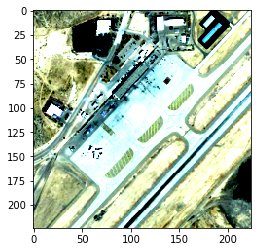

In [0]:
f1= AID_train[250][0]
#plt.imshow(sample), print(AID_train[2500][1])

import matplotlib.pyplot as plt

#f1=f1.numpy()[::-1,:,:]
print(f1.shape)
#f1=f1.view(f1.shape[1],f1.shape[2],f1.shape[0] ) #,f1.shape[0])

plt.imshow(f1.permute(1,2,0))
plt.show( )


In [0]:
target_train_1 = torch.utils.data.DataLoader(target_train,batch_size=6, shuffle=True)
target_test_1 = torch.utils.data.DataLoader(target_test,batch_size=2, shuffle=True)
source_train_1 = torch.utils.data.DataLoader(source_train,batch_size=6, shuffle=True)
source_test_1 = torch.utils.data.DataLoader(source_test,batch_size=2, shuffle=True)

In [0]:
#x = x.expand(x.data.shape[0], 3, image_size, image_size)
    
    #features = self.feature_extractor(x)
device='cpu'
res50_model.to(device)
x_s, y_s = next(iter(source_train_1))   
x_s.to(device)
f1 = f1.expand(f1.shape[0], 3, image_size, image_size)
features = res50_conv(x_s)

In [0]:
features.shape

torch.Size([6, 2048, 1, 1])

In [0]:
model = DACNN(res50_model)

x_s, y_s = next(iter(source_train_1))
x_t, y_t = next(iter(target_train_1))

print('source domain: ', x_s.shape, y_s.shape)
print('target domain: ', x_t.shape, y_t.shape)

model(x_s)
model(x_t)

source domain:  torch.Size([6, 3, 224, 224]) torch.Size([6])
target domain:  torch.Size([6, 3, 224, 224]) torch.Size([6])


(tensor([[-2.8751, -1.6861, -2.4499, -1.8987, -2.4252, -2.3929, -1.8414, -2.8156,
          -2.8672, -2.7010],
         [-2.3684, -2.2584, -2.4750, -2.7368, -2.2155, -2.2505, -2.5704, -1.9399,
          -2.1614, -2.2723],
         [-2.9784, -1.8323, -2.9846, -2.0014, -3.4724, -2.2799, -2.3714, -2.5356,
          -2.0637, -1.7691],
         [-1.8656, -2.3310, -2.5836, -2.3823, -2.5314, -1.8266, -2.7277, -2.4751,
          -2.9766, -1.9720],
         [-2.6455, -2.1243, -2.5989, -2.3139, -2.2521, -2.2138, -2.4866, -1.9232,
          -2.3191, -2.3633],
         [-2.8995, -1.8340, -2.4401, -2.2630, -1.9814, -2.9354, -2.4948, -1.8337,
          -2.5036, -2.5398]], grad_fn=<LogSoftmaxBackward>),
 tensor([[-0.6589, -0.7286],
         [-0.7685, -0.6230],
         [-0.8500, -0.5576],
         [-0.8781, -0.5371],
         [-0.7566, -0.6335],
         [-0.6562, -0.7315]], grad_fn=<LogSoftmaxBackward>),
 tensor([[-2.5832,  0.2878, -0.7078,  ..., -2.0543,  0.5616,  1.8584],
         [-0.3557,  0.013

In [0]:
x_s.shape

torch.Size([6, 3, 224, 224])

In [0]:
ux_s, y_s = next(iter(source_train_1))
print(x_s.shape,y_s.shape)

torch.Size([6, 3, 224, 224]) torch.Size([6])


In [0]:
y_s

tensor([9, 9, 0, 3, 7, 2])

In [0]:
import torch.optim as optim
# lr = 1e-3
# n_epochs=1
device='cuda'

model=DACNN(res50_model).to(device)
#for params in model.parameters():
#  params.requires_grad= True
params_non_frozen = filter(lambda p: p.requires_grad, model.parameters())
#model.cuda()
#optimizer = optim.SGD(params_non_frozen, lr=0.05, momentum=0.9)
optimizer = optim.Adam(params_non_frozen, lr=0.0005,betas=(0.5, 0.999))
lr_sched = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.02, patience=5)
#lr_sched = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
loss_fn_class = torch.nn.NLLLoss()
loss_fn_domain= torch.nn.NLLLoss()


In [0]:
len(source_train_1), len(target_train_1)

(452, 131)

In [0]:
max_batches= min(len(source_train_1), len(target_train_1))


In [0]:
max_batches

131

In [0]:

# n_epochs=400
# batch_size=6

# #min_loss=100

# steps=0
# import numpy as np
# for epoch_idx in range(n_epochs):
#   print(f'Epoch{epoch_idx+1:04d}/ {n_epochs:04d}', end= '\n=============\n')
#   dl_source_iter= iter(source_train_1)
#   dl_target_iter= iter(target_train_1)
#   dl_source_iter_test= iter(source_test_1)
#   dl_target_iter_test= iter(target_test_1)
  
#   #Total_target_loss=0
  
#   for batch_idx in range(max_batches):
#     steps+=1
#     optimizer.zero_grad()
    
#     p= float(batch_idx + epoch_idx*max_batches)/(n_epochs*max_batches)
#     grl_lambda= 2./ (1.+np.exp(-10*p))-1
#     #grl_lambda= 1
    
    
#     x_s,y_s = next(dl_source_iter)
#     #print(x_s.size(), y_s.size())
#     x_s, y_s = x_s.to(device), y_s.to(device)
#     y_s_domain= torch.zeros(batch_size, dtype= torch.long)
#     y_s_domain= y_s_domain.to(device)
    
#     class_pred, domain_pred,_= model(x_s, grl_lambda)
#     loss_s_label=loss_fn_class(class_pred, y_s)
#     loss_s_domain = loss_fn_domain(domain_pred, y_s_domain)
    
#     x_t, _ = next(dl_target_iter)
#     y_t_domain = torch.ones(batch_size, dtype= torch.long)
    
#     x_t, y_t_domain = x_t.to(device), y_t_domain.to(device)
    
#     _, domain_pred,_= model(x_t, grl_lambda)
    
#     loss_t_domain= loss_fn_domain(domain_pred, y_t_domain)
    
    
#     loss = loss_t_domain +loss_s_domain + loss_s_label
#     #Total_target_loss += loss
   
#     loss.backward()
#     optimizer.step()
#     #lr_sched.step(loss)
    
    
#     #if (steps%10) == 0:
#   torch.no_grad()
#   model.eval()
#   test_loss1=0
#   accuracy1=0
        
#   test_loss2=0
#   accuracy2=0
#   Total_test_loss=0
        
#   for t_images, t_labels in iter(target_test_1):
    
#     t_images, t_labels = t_images.to(device), t_labels.to(device)
#     t_logps,_,_= model(t_images, grl_lambda)
#     t_loss= loss_fn_class(t_logps, t_labels)
#     #test_loss1 += t_loss
          
          
#     t_ps = torch.exp(t_logps)
          
#     t_top_ps, t_top_class = t_ps.topk(1 ,dim=1)
#     equality= t_top_class==t_labels.view(*t_top_class.shape)
#     accuracy1 += torch.mean(equality.type(torch.FloatTensor)).item()
    

          
#   for s_images, s_labels in iter(source_test_1):
#     s_images, s_labels = s_images.to(device), s_labels.to(device)
#     s_logps,_,_= model(s_images, grl_lambda)
#     s_loss= loss_fn_class(s_logps, s_labels)
#     #test_loss2 += s_loss
          
          
#     s_ps = torch.exp(s_logps)
          
#     s_top_ps, s_top_class = s_ps.topk(1 ,dim=1)
#     equality= s_top_class==s_labels.view(*s_top_class.shape)
#     accuracy2 += torch.mean(equality.type(torch.FloatTensor)).item()
    
#   #Total_test_loss= test_loss1 + test_loss2
          
        
  
  
#   #if (Total_test_loss < min_loss):
#   #    torch.save(model.state_dict(),'checkpoint6.pth')
#   #    min_loss = Total_test_loss
    
#   print(f'[{batch_idx+1}/{max_batches}]'
#         f'total_loss: {loss.item(): .4f}       '     f's_domain_loss: {loss_s_domain.item():.4f}   '
#         f't_domain_loss:{loss_t_domain.item():.4f}       '     f'grl_lambda: {grl_lambda:.3f}    '
#         f'Target accuracy: {accuracy1/len(target_test_1):.3f}   '    f'source accuracy: {accuracy2/len(source_test_1):.3f}     '
#         f'Total accuracy: {(accuracy2 + accuracy1) /(len(source_test_1)+ len(target_test_1)):.3f}     '
#         )
#         #   f'Total_test_loss: {Total_test_loss.item():.3f}'
#         #)
      
#   model.train()
      
      
      

In [0]:
classification_loss=[]
domain_loss=[]
total_loss=[]
test_accuracy=[]

In [0]:
n_epochs=200
batch_size=6

min_accuracy=0

steps=0
import numpy as np
for epoch_idx in range(n_epochs):
  print(f'Epoch{epoch_idx+1:04d}/ {n_epochs:04d}', end= '\n=============\n')
  dl_source_iter= iter(source_train_1)
  dl_target_iter= iter(target_train_1)
  dl_source_iter_test= iter(source_test_1)
  dl_target_iter_test= iter(target_test_1)
  
  #Total_target_loss=0
  loss_epoch=0
  classification_epoch=0
  domain_epoch=0
  for batch_idx in range(max_batches):
    steps+=1
    optimizer.zero_grad()
    
    p= float(batch_idx + epoch_idx*max_batches)/(n_epochs*max_batches)
    #grl_lambda= 2./ (1.+np.exp(-10*p))-1
    grl_lambda= 1
    
    
    x_s,y_s = next(dl_source_iter)
    #print(x_s.size(), y_s.size())
    x_s, y_s = x_s.to(device), y_s.to(device)
    y_s_domain= torch.zeros(batch_size, dtype= torch.long)
    y_s_domain= y_s_domain.to(device)
    
    class_pred, domain_pred,_= model(x_s, grl_lambda)
    loss_s_label=loss_fn_class(class_pred, y_s)
    loss_s_domain = loss_fn_domain(domain_pred, y_s_domain)
    
    #loss_s_label= loss_s_label*0.4
    #loss_s_domain= loss_s_domain*0.4
    
    
    
    x_t, y_t = next(dl_target_iter)
    y_t_domain = torch.ones(batch_size, dtype= torch.long)
    y_t_domain=  y_t_domain.to(device)
    
    x_t, y_t = x_t.to(device), y_t.to(device)
    
    class_pred_D, domain_pred,_= model(x_t, grl_lambda)
    #loss_s_label_D=loss_fn_class(class_pred_D, y_t)
    
    loss_t_domain= loss_fn_domain(domain_pred, y_t_domain)
    
    #loss_s_label_D= loss_s_label_D*0.6
    #loss_t_domain=loss_t_domain*0.6
    
    classification=loss_s_label  #+ loss_s_label_D
    
    classification_epoch +=classification.item()
    
  
    
    domain= loss_t_domain + loss_s_domain
    
    domain_epoch += domain.item()
    
    
    
    loss = loss_s_label + loss_t_domain + loss_s_domain
    loss_epoch += loss.item()
    #total_loss.append(loss.item())
    #Total_target_loss += loss
   
    loss.backward()
    optimizer.step()
    #lr_sched.step(loss)
    
  total_loss.append(loss_epoch)
  classification_loss.append(classification_epoch)
  domain_loss.append(domain_epoch)
    
    
    #if (steps%10) == 0:
  torch.no_grad()
  model.eval()
  test_loss1=0
  accuracy1=0
        
  test_loss2=0
  accuracy2=0
  Total_test_loss=0
        
  for t_images, t_labels in iter(target_test_1):
    
    t_images, t_labels = t_images.to(device), t_labels.to(device)
    t_logps,_,_= model(t_images, grl_lambda)
    t_loss= loss_fn_class(t_logps, t_labels)
    #test_loss1 += t_loss
          
          
    t_ps = torch.exp(t_logps)
          
    t_top_ps, t_top_class = t_ps.topk(1 ,dim=1)
    equality= t_top_class==t_labels.view(*t_top_class.shape)
    accuracy1 += torch.mean(equality.type(torch.FloatTensor)).item()
    

          
  for s_images, s_labels in iter(source_test_1):
    s_images, s_labels = s_images.to(device), s_labels.to(device)
    s_logps,_,_= model(s_images, grl_lambda)
    s_loss= loss_fn_class(s_logps, s_labels)
    #test_loss2 += s_loss
          
          
    s_ps = torch.exp(s_logps)
          
    s_top_ps, s_top_class = s_ps.topk(1 ,dim=1)
    equality= s_top_class==s_labels.view(*s_top_class.shape)
    accuracy2 += torch.mean(equality.type(torch.FloatTensor)).item()
    
  #Total_test_loss= test_loss1 + test_loss2
  
  Total_accuracy = ((accuracy2 + accuracy1) /(len(source_test_1)+ len(target_test_1)))*100     
  test_accuracy.append(Total_accuracy)
        
  
  
  if (Total_accuracy > min_accuracy):
      torch.save(model.state_dict(),'checkpoint_mixed.pth')
      min_accuracy = Total_accuracy
    
  print(f'[{batch_idx+1}/{max_batches}]'
        f'total_loss: {loss_epoch: .4f}       '
        f'Domain loss: {domain_epoch: .4f}  '
        f'Target accuracy: {accuracy1/len(target_test_1):.3f}   '    
        f'source accuracy: {accuracy2/len(source_test_1):.3f}   '
        f'Total accuracy: {(accuracy2 + accuracy1) /(len(source_test_1)+ len(target_test_1)):.3f}  '
        
        )
        #   f'Total_test_loss: {Total_test_loss.item():.3f}'
        #)
      
  model.train()
      

Epoch0001/ 0200
Epoch0001/ 0200
[131/131]total_loss:  413.3580       Domain loss:  184.2895  Target accuracy: 0.380   source accuracy: 0.667   Total accuracy: 0.601  
Epoch0002/ 0200
[131/131]total_loss:  413.3580       Domain loss:  184.2895  Target accuracy: 0.380   source accuracy: 0.667   Total accuracy: 0.601  
Epoch0002/ 0200
[131/131]total_loss:  359.2950       Domain loss:  182.2922  Target accuracy: 0.440   source accuracy: 0.737   Total accuracy: 0.670  
Epoch0003/ 0200
[131/131]total_loss:  359.2950       Domain loss:  182.2922  Target accuracy: 0.440   source accuracy: 0.737   Total accuracy: 0.670  
Epoch0003/ 0200
[131/131]total_loss:  327.8789       Domain loss:  181.2631  Target accuracy: 0.450   source accuracy: 0.824   Total accuracy: 0.739  
Epoch0004/ 0200
[131/131]total_loss:  327.8789       Domain loss:  181.2631  Target accuracy: 0.450   source accuracy: 0.824   Total accuracy: 0.739  
Epoch0004/ 0200
[131/131]total_loss:  317.5322       Domain loss:  181.0737  T

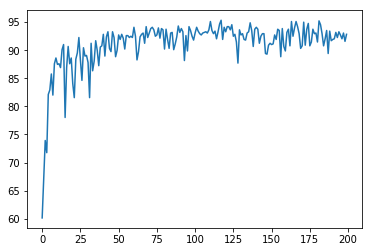

In [0]:
plt.plot(test_accuracy, label='test accuracy')

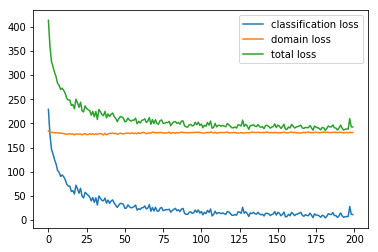

In [0]:

# plotting the training and validation loss
plt.plot(classification_loss, label='classification loss')
plt.plot(domain_loss, label='domain loss')
plt.plot(total_loss, label='total loss')
#plt.plot(test_accuracy, label='test accuracy')
plt.legend()
plt.show()

In [0]:
min_accuracy

95.33029612756265

95.33029612756265

In [0]:
statedict=torch.load('checkpoint_mixed.pth')
print(statedict.keys())

odict_keys(['feature_extractor.0.weight', 'feature_extractor.0.bias', 'feature_extractor.1.weight', 'feature_extractor.1.bias', 'feature_extractor.1.running_mean', 'feature_extractor.1.running_var', 'feature_extractor.1.num_batches_tracked', 'feature_extractor.4.weight', 'feature_extractor.4.bias', 'feature_extractor.5.weight', 'feature_extractor.5.bias', 'feature_extractor.5.running_mean', 'feature_extractor.5.running_var', 'feature_extractor.5.num_batches_tracked', 'resnet.conv1.weight', 'resnet.bn1.weight', 'resnet.bn1.bias', 'resnet.bn1.running_mean', 'resnet.bn1.running_var', 'resnet.bn1.num_batches_tracked', 'resnet.layer1.0.conv1.weight', 'resnet.layer1.0.bn1.weight', 'resnet.layer1.0.bn1.bias', 'resnet.layer1.0.bn1.running_mean', 'resnet.layer1.0.bn1.running_var', 'resnet.layer1.0.bn1.num_batches_tracked', 'resnet.layer1.0.conv2.weight', 'resnet.layer1.0.bn2.weight', 'resnet.layer1.0.bn2.bias', 'resnet.layer1.0.bn2.running_mean', 'resnet.layer1.0.bn2.running_var', 'resnet.layer

In [0]:

model.load_state_dict(statedict)

<All keys matched successfully>

In [0]:
target_uc = torch.utils.data.DataLoader(target_train,batch_size=1, shuffle=True)
#target_test_1 = torch.utils.data.DataLoader(target_test,batch_size=2, shuffle=True)
source_ad = torch.utils.data.DataLoader(source_train,batch_size=1, shuffle=True)
#source_test_1 = torch.utils.data.DataLoader(source_test,batch_size=2, shuffle=True)

In [0]:
def extract_features_da(model, dataloader):
    use_gpu =torch.cuda.is_available()
    if (use_gpu):
      model.cuda()
    features = None
    for i, data in enumerate(dataloader):
        inputs = data[0]
        if (use_gpu):
            inputs = inputs.cuda()
        #inputs = Variable(inputs)
        torch.no_grad()
        model.eval()
        _,_,f_temp = model(inputs)
        print(i,end=' ')
        print(f_temp.size())
        if i==0:
            s= f_temp.size()
        if f_temp.size() != s:
            continue
        if i == 0:
            features = f_temp
        else:
            features = torch.cat((features, f_temp))
    features = features.data
    if use_gpu:
        features = features.cpu()
    return features

In [0]:
for param in model.parameters():
    param.requires_grad = False

In [0]:
uc = extract_features_da(model, target_uc)

0 torch.Size([1, 1000])
1 torch.Size([1, 1000])
2 torch.Size([1, 1000])
3 torch.Size([1, 1000])
4 torch.Size([1, 1000])
5 torch.Size([1, 1000])
6 torch.Size([1, 1000])
7 torch.Size([1, 1000])
8 torch.Size([1, 1000])
9 torch.Size([1, 1000])
10 torch.Size([1, 1000])
11 torch.Size([1, 1000])
12 torch.Size([1, 1000])
13 torch.Size([1, 1000])
14 torch.Size([1, 1000])
15 torch.Size([1, 1000])
16 torch.Size([1, 1000])
17 torch.Size([1, 1000])
18 torch.Size([1, 1000])
19 torch.Size([1, 1000])
20 torch.Size([1, 1000])
21 torch.Size([1, 1000])
22 torch.Size([1, 1000])
23 torch.Size([1, 1000])
24 torch.Size([1, 1000])
25 torch.Size([1, 1000])
26 torch.Size([1, 1000])
27 torch.Size([1, 1000])
28 torch.Size([1, 1000])
29 torch.Size([1, 1000])
30 torch.Size([1, 1000])
31 torch.Size([1, 1000])
32 torch.Size([1, 1000])
33 torch.Size([1, 1000])
34 torch.Size([1, 1000])
35 torch.Size([1, 1000])
36 torch.Size([1, 1000])
37 torch.Size([1, 1000])
38 torch.Size([1, 1000])
39 torch.Size([1, 1000])
40 torch.S

In [0]:
ad = extract_features_da(model, source_ad)

0 torch.Size([1, 1000])
1 torch.Size([1, 1000])
2 torch.Size([1, 1000])
3 torch.Size([1, 1000])
4 torch.Size([1, 1000])
5 torch.Size([1, 1000])
6 torch.Size([1, 1000])
7 torch.Size([1, 1000])
8 torch.Size([1, 1000])
9 torch.Size([1, 1000])
10 torch.Size([1, 1000])
11 torch.Size([1, 1000])
12 torch.Size([1, 1000])
13 torch.Size([1, 1000])
14 torch.Size([1, 1000])
15 torch.Size([1, 1000])
16 torch.Size([1, 1000])
17 torch.Size([1, 1000])
18 torch.Size([1, 1000])
19 torch.Size([1, 1000])
20 torch.Size([1, 1000])
21 torch.Size([1, 1000])
22 torch.Size([1, 1000])
23 torch.Size([1, 1000])
24 torch.Size([1, 1000])
25 torch.Size([1, 1000])
26 torch.Size([1, 1000])
27 torch.Size([1, 1000])
28 torch.Size([1, 1000])
29 torch.Size([1, 1000])
30 torch.Size([1, 1000])
31 torch.Size([1, 1000])
32 torch.Size([1, 1000])
33 torch.Size([1, 1000])
34 torch.Size([1, 1000])
35 torch.Size([1, 1000])
36 torch.Size([1, 1000])
37 torch.Size([1, 1000])
38 torch.Size([1, 1000])
39 torch.Size([1, 1000])
40 torch.S

In [0]:
import matplotlib.pyplot as plt

from sklearn import manifold
%matplotlib inline

In [0]:
import numpy
from sklearn.manifold import TSNE
import seaborn as sn

In [0]:
def visualise(sample_num,source=uc,target=ad):
    
    sample_num=sample_num
    source_num = source.shape[0]
    target_num = target.shape[0]
    labels1=numpy.ones(source_num)
    labels0=numpy.zeros(target_num)
    if sample_num:
      features_UCM, features_AID = source[:sample_num,:], target[:sample_num,:]
      labels1, labels0 = labels1[:sample_num], labels0[:sample_num]
        
    data = np.vstack((features_UCM, features_AID))
    labels= np.vstack((labels1.T, labels0.T))
    print(data.shape, labels.shape)
    labels=labels.reshape(sample_num*2,-1)
    
   
    
    model= TSNE(n_components=2,random_state=0,perplexity=50, n_iter=500)
    tsne_data= model.fit_transform(data)
    tsne_data=np.vstack((tsne_data.T,labels.T)).T
    tsne_df=pd.DataFrame(data=tsne_data,columns=('dim1','dim2','labels'))
    
    sn.FacetGrid(tsne_df,hue='labels',size=10).map(plt.scatter,'dim1','dim2').add_legend()
    plt.show
    plt.title('Domain adoptation Plot of UC Merced and AID datasets')

(1000, 1000) (2, 500)


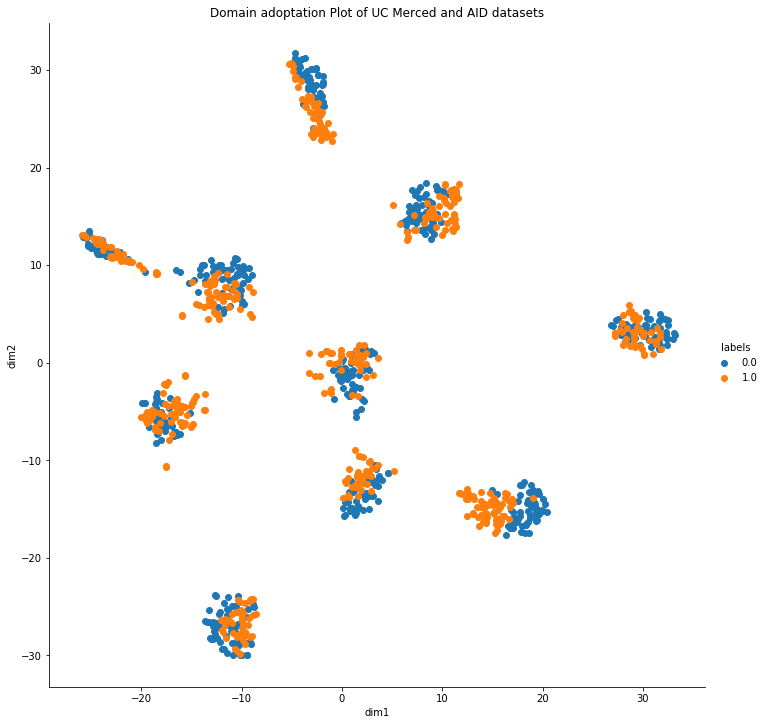

In [0]:
visualise(sample_num=500)

In [0]:
device='cuda'
model = Dann().to(device)
#optimizer = optim.Adam(model.parameters(),weight_decay=1e-5)
optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum= 0.9)
#optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion = nn.CrossEntropyLoss()

def optimizer_scheduler(optimizer, p):
    for param_group in optimizer.param_groups:
        param_group['lr'] = 0.01 / (1. + 10 * p) ** 0.75
    return optimizer

In [0]:
def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in source_test:
            data, target = data.to(device), target.to(device)
            output, _ = model(data,0.5)
            test_loss += float(criterion(output, target))  # sum up batch loss
            pred = output.max(1, keepdim=True)[1]  # get the index of the max log-probability
            correct += float(pred.eq(target.view_as(pred)).sum())

    test_loss /= len(source_test.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(source_test.dataset),
        100. * correct / len(source_test.dataset)))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in target_train:
            data, target = data.to(device), target.to(device)
            output, _ = model(data,0.5)
            test_loss += float(criterion(output, target))  # sum up batch loss
            pred = output.max(1, keepdim=True)[1]  # get the index of the max log-probability
            correct += float(pred.eq(target.view_as(pred)).sum())

    test_loss /= len(target_train.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(target_train.dataset),
        100. * correct / len(target_train.dataset)))
    
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in target_test:
            data, target = data.to(device), target.to(device)
            output, _ = model(data,0.5)
            test_loss += float(criterion(output, target))  # sum up batch loss
            pred = output.max(1, keepdim=True)[1]  # get the index of the max log-probability
            correct += float(pred.eq(target.view_as(pred)).sum())

    test_loss /= len(target_test.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(target_test.dataset),
        100. * correct / len(target_test.dataset)))

In [0]:
print(len(target_train),len(source_train))

In [0]:
allepoch=100

for epoch in range(allepoch):
    len_dataloader = min(len(source_train), len(target_train))
    total_steps = allepoch * len(source_train)
    i = 0
    model.train()
    for batch_idx, (data_source, data_target) in enumerate(zip(source_train, target_train)):
        start_time = time.time()
        s_img, s_label = data_source

        start_steps = epoch * len(source_train)

        p = float(i + start_steps) / total_steps
        alpha = 2. / (1. + np.exp(-10 * p)) - 1

        optimizer = optimizer_scheduler(optimizer, p)
        optimizer.zero_grad()


        batch_size = len(s_label)

        domain_label = torch.zeros(batch_size)
        domain_label = domain_label.long()


        a,b = model(s_img.to(device),alpha)
        err_s_label = criterion(a, s_label.to(device))
        err_s_domain = criterion(b, domain_label.to(device))

        # training model using target data
        t_img, _ = data_target

        batch_size = len(t_img)

        domain_label = torch.ones(batch_size)
        domain_label = domain_label.long()



        _, b = model(t_img.to(device),alpha)
        err_t_domain = criterion(b, domain_label.to(device))
        err = err_s_label + err_s_domain + err_t_domain
        err.backward()
        optimizer.step()


        if(i % 1000 == 0):
            print('epoch:{},[{}/{}],s_label:{:.3f},s_domain:{:.3f},t_domain:{:.3f},time{}'.
                      format(epoch, i, len_dataloader, float(err_s_label), float(err_s_domain),
                             float(err_t_domain), time.time() - start_time))

        i += 1

    test(epoch)